In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:

def getData_half(cfileName):
    """
    Reads only the first half of the complex samples from a .cfile.
    The file is assumed to contain interleaved float32 I and Q samples.
    """
    # Get file size in bytes
    file_size = os.path.getsize(cfileName)
    # Determine total number of float32 samples in the file
    num_floats = file_size // 4
    # Each complex sample requires 2 floats.
    # The full complex array would have num_floats//2 elements.
    # To get only half of that, we need to read:
    count = (num_floats // 4) * 2  # (num_floats//4 complex samples)
    
    # Read only 'count' float32 numbers from the file
    data = np.fromfile(cfileName, dtype="float32", count=count)
    
    # Form complex samples: every pair (I, Q)
    data_complex = data[0::2] + 1j * data[1::2]
    
    return data_complex



In [6]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [7]:
class_label = 0

In [8]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/autheticated_firemware/original")
print(data.shape)

(212153772,)


In [9]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
118391
(2048, 118391)


In [10]:
del data

Zxx = Zxx.transpose()

X = Zxx[:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)
del Zxx

print(X.shape)
print(y.shape)

(10000, 2048)
(10000,)


In [11]:
class_label = 1 #remove random API

In [12]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/remove_rgn")
print(data.shape)

(211748722,)


In [13]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
118165
(2048, 118165)


In [14]:
del data

Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

print(X.shape)
print(y.shape)

(20000, 2048)
(20000,)


In [15]:
class_label = 2 #ping_first

In [16]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_first")
print(data.shape)

(211288125,)


In [17]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
117908
(2048, 117908)


In [18]:
del data

Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

print(X.shape)
print(y.shape)

(30000, 2048)
(30000,)


In [19]:
class_label = 3 #ping_middle

In [20]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_middle")
print(data.shape)

(214828233,)


In [21]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
119883
(2048, 119883)


In [22]:
del data

Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

print(X.shape)
print(y.shape)

(40000, 2048)
(40000,)


In [23]:
class_label = 4 #ping_last

In [24]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_last")
print(data.shape)

(212337083,)


In [25]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
118493
(2048, 118493)


In [26]:
del data

Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

print(X.shape)
print(y.shape)

(50000, 2048)
(50000,)


In [27]:
class_label = 5 #infoGather

In [28]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/infoGather")
print(data.shape)

(210503583,)


In [29]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
117470
(2048, 117470)


In [30]:
del data

Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

print(X.shape)
print(y.shape)

(60000, 2048)
(60000,)


In [31]:
class_label = 6 #update weather

In [32]:
data = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/update_weatherRequest_different_payload")
print(data.shape)

(212010598,)


In [33]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/tmp/ipykernel_204620/3323255673.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


2048
118311
(2048, 118311)


In [34]:
del data

Zxx = Zxx.transpose()

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

print(X.shape)
print(y.shape)

(70000, 2048)
(70000,)


In [35]:
X = abs(X)

# scaling the features (only real part of the data can be used)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers

In [45]:

# Example: Creating a feedforward model with dropout & batch normalization
def create_model(feature_vector_size):
    model = keras.models.Sequential()
    
    # Input Layer
    model.add(layers.Input(shape=(feature_vector_size,)))
    
    # Hidden Layer 1
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    
    # Hidden Layer 2
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    
    # Hidden Layer 3
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    
    # Output Layer for 7 classes
    model.add(layers.Dense(7, activation="softmax"))
    
    # Compile the model
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["accuracy"]
    )
    
    return model




In [46]:
# Example usage:
# Suppose feature_vector_size = 300
model = create_model(feature_vector_size)
model.summary()

# Early Stopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,               # Stop after 5 epochs with no improvement
    restore_best_weights=True # Roll back to the best weights
)

# Train the model (X_train, y_train are your training data)
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       154,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,823 (1.23 MB)

 Trainable params: 321,031 (1.22 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 300, but received input with shape (None, 2048)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2048), dtype=float32)
  • training=True
  • mask=None

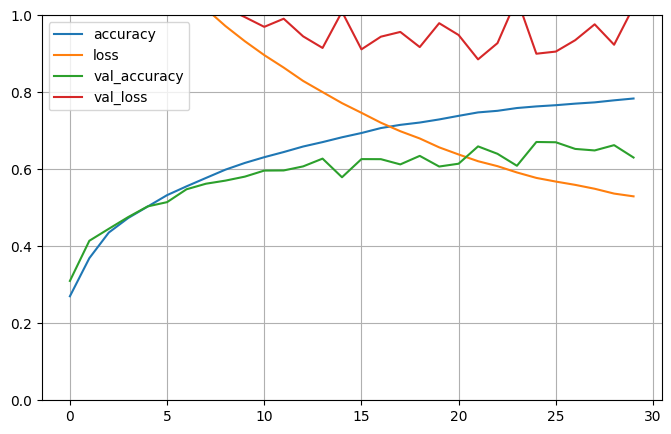

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()